# Hacker Rank Problem

### Problem : To determines the property prices in Bengaluru.

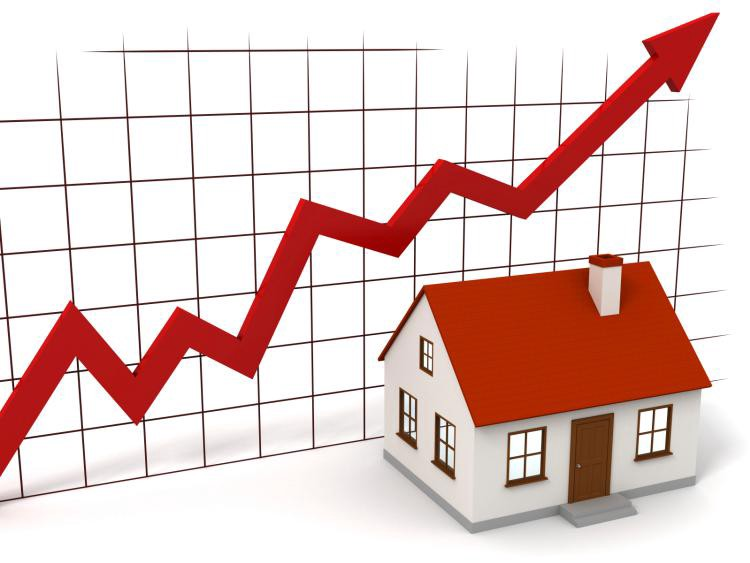

In [1]:
#importing the necessary Libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
#Loading the dataset - this is on the train data
data = pd.read_csv('Train.csv')

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Columns:

1. area_type - Describes the area

2. availability - Describes when it can be possessed or when it is ready(categorical and time-series)

3. location - Describes where the house is located in Bengaluru 

4. size - in BHK or Bedroom (1-10 or more)

5. society - to which society it belongs

6. total_sqft - size of the property in sq.ft 

7. bath - No. of bathrooms 

8. balcony - No. of the balcony

9. Price - Value of the property in lakhs(INR)

### => Exploration of data

In [4]:
print('There are:',data.shape[0],'rows and', data.shape[1],'cols')

There are: 13320 rows and 9 cols


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
#total_sqft should be in numbers not object.

In [7]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
data['availability'].value_counts()

Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
19-Apr                     16
Immediate Possession       16
20-Aug                     16
19-Oct                     15
21-Mar                     14
17-Jun                     13
21-May    

In [9]:
data['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [10]:
data['location'].value_counts()

Whitefield                                            540
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bellandur     

In [11]:
data['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
Prtanha    51
Bhmesy     51
Prityel    50
PrityTr    49
Prarkun    49
Dhalsh     47
IBityin    45
SNity S    40
Soresea    39
Adeatlm    37
Soitya     36
Rosha I    35
Bhe 2ko    35
SunceEs    34
SNnia E    33
JRrnauv    30
MenueNo    29
Prlla C    28
PuandHi    28
RothaVa    27
Prncyrn    27
GoAirej    26
Aklia R    26
Raard B    26
PhestOn    26
Puachal    26
DLhtsnd    24
Dieldli    24
Itelaa     24
Soazak     24
Sodgere    23
ViistLa    23
Brnia G    23
PualeSk    23
Shitt S    23
Soiewre    22
Prrtht     21
DLhtsan    21
RInceeg    21
Brway G    21
SoechHa    21
DLhtsen    20
AsastDe    20
Eladero    20
Shthi S    20
Prersis    19
Magiaya    19
Jaades     19
Klark L    19
PueraRi    18
Brica E    17
SSestth    17
SaireSa    17
Oreldhi    17
Prensya    16
KHatsFl    16
Baowsig    16
SSthamh    16
Sariaat    15
BrlisCo    15
NRosete    15
Sosisic    15
GolusLi    15
Tavenew    14
Taonte     14
PuziaVe    14
BriumM

In [12]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [13]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
data['total_sqft'].value_counts()

1200                 843
1100                 221
1500                 205
2400                 196
600                  180
1000                 172
1350                 133
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 101
1140                  91
2000                  83
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1550                  60
1160                  60
1125                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1220                  55
1080                  55
1070                  53
700                   52
750                   52
1225                  48
4000                  48
1175                  48


### => Data Cleaning

In [15]:
#knowing about the missing values
features_with_na = [features for features in data.columns if data[features].isnull().sum()>=1]

#calculating % of missing values each features has
for feature in features_with_na:
    print(feature,'is:',np.round(data[feature].isnull().mean()*100,2),'% of missing values')

location is: 0.01 % of missing values
size is: 0.12 % of missing values
society is: 41.31 % of missing values
bath is: 0.55 % of missing values
balcony is: 4.57 % of missing values


In [16]:
#replacing the Nan values with text- 'missing_society'
data['society'].fillna('Missing_society',inplace=True)

In [17]:
data.isnull().sum()

area_type         0
availability      0
location          1
size             16
society           0
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [18]:
#since location has only 1 missing value we are going to remove the row
data.dropna(subset=['location'],inplace=True)

In [19]:
data.isnull().sum()

area_type         0
availability      0
location          0
size             16
society           0
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [20]:
#filling the balcony and bath with the median value
# firstly grouping them wrt the location and as per that we will apply 

data['bath'] = data.groupby(['location'])['bath'].transform(lambda x: x.fillna(x.median()))
data['balcony'] = data.groupby(['location'])['balcony'].transform(lambda x: x.fillna(x.median()))
print('Done replacing the nan values in bath and balcony by their median')

Done replacing the nan values in bath and balcony by their median


In [21]:
data.isnull().sum()

area_type        0
availability     0
location         0
size            16
society          0
total_sqft       0
bath             1
balcony         45
price            0
dtype: int64

In [22]:
data['bath'].fillna(data['bath'].median(),inplace=True)
data['balcony'].fillna(data['balcony'].median(),inplace=True)

In [23]:
data.isnull().sum()

area_type        0
availability     0
location         0
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [24]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
# converting the size col to # of bedrooms / BHK
data['size'] = data['size'].apply(lambda x: str(x).split(' ')[0]).astype(float)

In [26]:
#now replacing all the null values in size by median
data['size'] = data.groupby('location')['size'].transform(lambda x: x.fillna(x.median()))

In [27]:
data['size'] = data['size'].fillna(data['size'].median())

In [28]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

- Now there is no Null values in our dataset

In [29]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,Missing_society,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,Missing_society,1200,2.0,1.0,51.00


In [30]:
data['total_sqft'].value_counts()

1200                 843
1100                 221
1500                 205
2400                 196
600                  180
1000                 172
1350                 133
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  83
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1550                  60
1160                  60
1125                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1220                  55
1080                  55
1070                  53
700                   52
750                   52
1225                  48
4000                  48
1175                  48


In [31]:
def processing_total_sqft(my_list):
    if len(my_list) == 1:
        
        try:
            return float(my_list[0])
        except:
            strings = ['Sq. Meter', 'Sq. Yards', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds']
            split_list = re.split('(\d*.*\d)', my_list[0])[1:]
            area = float(split_list[0])
            type_of_area = split_list[1]
            
            if type_of_area == 'Sq. Meter':
                area_in_sqft = area * 10.7639
            elif type_of_area == 'Sq. Yards':
                area_in_sqft = area * 9.0
            elif type_of_area == 'Perch':
                area_in_sqft = area * 272.25
            elif type_of_area == 'Acres':
                area_in_sqft = area * 43560.0
            elif type_of_area == 'Cents':
                area_in_sqft = area * 435.61545
            elif type_of_area == 'Guntha':
                area_in_sqft = area * 1089.0
            elif type_of_area == 'Grounds':
                area_in_sqft = area * 2400.0
            return float(area_in_sqft)
        
    else:
        return (float(my_list[0]) + float(my_list[1]))/2.0     

In [32]:
data['total_sqft'] = data['total_sqft'].str.split('-').apply(processing_total_sqft)

In [33]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,Missing_society,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,Missing_society,1200.0,2.0,1.0,51.00


In [34]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

### Feature Engineering

In [35]:
#adding the new col
df = data.copy()

#prices are in lakhs
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [36]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3.0,Missing_society,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,Missing_society,1200.0,2.0,1.0,51.00,4250.000000


In [37]:
# Checking unique values of 'location' column
locations = list(df['location'].unique())
print(len(locations))

1305


In [38]:
# Removing the extra spaces at the end
df.location = df.location.apply(lambda x: x.strip())

# Calulating all the unqiue values in 'location' column
location_stats = df['location'].value_counts().sort_values(ascending=False)
location_stats

Whitefield                                            541
Sarjapur  Road                                        399
Electronic City                                       304
Kanakpura Road                                        273
Thanisandra                                           237
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Hennur Road                                           152
Bannerghatta Road                                     152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bellandur     

In [39]:
# Checking locations with less than 10 values
print(len(location_stats[location_stats<=10]), len(df.location.unique()))

1053 1294


In [40]:
#replacing the names of location with <10 value with 'Others'
locations_less_than_10 = location_stats[location_stats<=10]

df.location = df.location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(df.location.unique())

242

In [41]:
#checking the availability col
dates = df['availability'].value_counts()

In [42]:
is_not_ready = dates[dates<10000]
df['availability'] = df['availability'].apply(lambda x: 'Not Ready to Move' if x in is_not_ready else x)
len(df.availability.unique())

2

In [43]:
df['area_type'].value_counts() 

Super built-up  Area    8789
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

- Since the column has only few unique values, we don't perform any operation

In [44]:
df['price_per_sqft'].describe()

count    1.331900e+04
mean     7.902289e+03
std      1.062532e+05
min      2.257423e+00
25%      4.262295e+03
50%      5.428571e+03
75%      7.312469e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [45]:
# Since there is a wide range for 'price_per_sqft' column, we remove the extreme ends using the SD
def remove_pps_outliers(df):
    
    df_out = pd.DataFrame()
    
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df['price_per_sqft'])
        sd = np.std(sub_df['price_per_sqft'])
        reduce_df = sub_df[(sub_df['price_per_sqft']>(m-sd)) & (sub_df['price_per_sqft']<(m+sd))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    
    return df_out

df2 = remove_pps_outliers(df)
print(len(df), len(df2))

13319 11538


In [46]:
# Here we observe that 3 BHK cost that same as 2 BHK in 'Hebbal' location hence removing such outliers is necessary
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis='index')

df4 = remove_bhk_outliers(df2)
print(len(df2), len(df4))

11538 8090


Text(0, 0.5, 'Count')

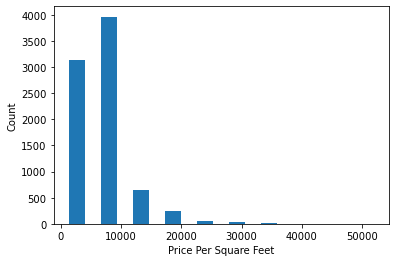

In [47]:
plt.hist(df4.price_per_sqft, rwidth=0.5)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

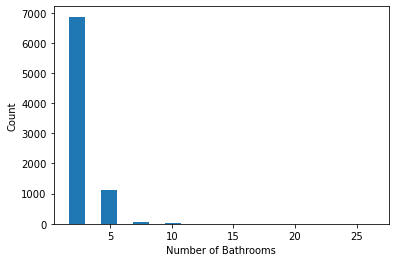

In [48]:
plt.hist(df4.bath, rwidth=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [49]:
# Removing the rows that have 'bath' greater than 'bhk'+2
df5 = df4[df4.bath<(df4.size+2)]
print(len(df4), len(df5))

8090 8090


In [50]:
df5.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Not Ready to Move,1st Block Jayanagar,4.0,Missing_society,2850.0,4.0,1.0,428.0,15017.543860
1,Super built-up Area,Not Ready to Move,1st Block Jayanagar,3.0,Missing_society,1630.0,3.0,2.0,194.0,11901.840491
2,Super built-up Area,Not Ready to Move,1st Block Jayanagar,6.0,Missing_society,1200.0,6.0,2.0,125.0,10416.666667
3,Super built-up Area,Ready To Move,1st Block Jayanagar,3.0,Missing_society,1875.0,2.0,3.0,235.0,12533.333333
4,Plot Area,Ready To Move,1st Block Jayanagar,7.0,Missing_society,930.0,4.0,2.0,85.0,9139.784946


### => Modeling

In [51]:
# Removing the unnecessary columns (columns that were added only for removing the outliers)
df6 = df5.copy()
df6 = df6.drop('price_per_sqft', axis='columns')

In [52]:
#converting categorical values to numerical values 

#1st doing for location feature
dummy_cols = pd.get_dummies(df6['location']).drop('other', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis = 'columns')

In [53]:
#2nd doing for area_type feature
dummy_cols1 = pd.get_dummies(df6['area_type'],drop_first = True)
df6 = pd.concat([df6,dummy_cols1],axis='columns')

In [54]:
#3rd doing for availability
dummy_cols2 = pd.get_dummies(df6['availability'],drop_first=True)
df6 = pd.concat([df6,dummy_cols2],axis='columns')

In [55]:
df6.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Carpet Area,Plot Area,Super built-up Area,Ready To Move
0,Super built-up Area,Not Ready to Move,1st Block Jayanagar,4.0,Missing_society,2850.0,4.0,1.0,428.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Super built-up Area,Not Ready to

In [56]:
#dropping the unecessary cols
df6.drop(['area_type','availability','location','society'],axis=1,inplace=True)

In [57]:
df6.head()

,size,total_sqft,bath,balcony,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Carpet Area,Plot Area,Super built-up Area,Ready To Move
0,4.0,2850.0,4.0,1.0,428.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3.0,1630.0,3.0,2.0,194.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [58]:
df6.shape

(8090, 250)

In [59]:
#splitting the data into feature and label
X = df6.drop('price',axis='columns')
y = df6['price']

In [60]:
X.head()

,size,total_sqft,bath,balcony,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Carpet Area,Plot Area,Super built-up Area,Ready To Move
0,4.0,2850.0,4.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3.0,1630.0,3.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [61]:
#using GridSearchCV to find the best algo for this prooblem.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

### Shuffle Split:
Random permutation cross-validator

Yields indices to split data into training and test sets.

Note: contrary to other cross-validation strategies, random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets.

In [64]:
# Creating a function for GridSearchCV

def find_best_model(X,y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(),
            'parameters': {
                'n_jobs': [4],
                'n_estimators': [100,200,150],
                'verbose':[1,2,3,4],
                'max_features' : ['auto']
            }
        }
    }
    
    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

find_best_model(X, y)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import ma

building tree 3 of 100
building tree 6 of 100
building tree 9 of 100
building tree 10 of 100
building tree 17 of 100
building tree 18 of 100
building tree 25 of 100
building tree 26 of 100
building tree 33 of 100
building tree 34 of 100
building tree 43 of 100
building tree 44 of 100
building tree 53 of 100
building tree 54 of 100
building tree 59 of 100
building tree 60 of 100
building tree 69 of 100
building tree 70 of 100
building tree 77 of 100
building tree 78 of 100
building tree 83 of 100
building tree 84 of 100
building tree 91 of 100
building tree 92 of 100
building tree 99 of 100
building tree 2 of 100
building tree 8 of 100
building tree 15 of 100
building tree 16 of 100
building tree 21 of 100
building tree 22 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 1

[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    4.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | 


building tree 77 of 100
building tree 78 of 100
building tree 85 of 100
building tree 86 of 100
building tree 91 of 100
building tree 92 of 100
building tree 98 of 100
building tree 3 of 100
building tree 8 of 100
building tree 13 of 100
building tree 14 of 100
building tree 23 of 100
building tree 24 of 100
building tree 31 of 100
building tree 32 of 100
building tree 39 of 100
building tree 40 of 100
building tree 47 of 100
building tree 48 of 100
building tree 53 of 100
building tree 54 of 100
building tree 61 of 100
building tree 62 of 100
building tree 69 of 100
building tree 70 of 100
building tree 79 of 100
building tree 80 of 100
building tree 87 of 100
building tree 88 of 100
building tree 95 of 100
building tree 96 of 100
building tree 100 of 100
building tree 4 of 200
building tree 8 of 200
building tree 15 of 200
building tree 16 of 200
building tree 23 of 200
building tree 24 of 200
building tree 31 of 200
building tree 32 of 200
building tree 39 of 200
building tree 40 o

[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 172 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  26 tasks      | 


building tree 23 of 200
building tree 24 of 200
building tree 29 of 200
building tree 30 of 200
building tree 37 of 200
building tree 38 of 200
building tree 45 of 200
building tree 46 of 200
building tree 55 of 200
building tree 56 of 200
building tree 61 of 200
building tree 62 of 200
building tree 67 of 200
building tree 68 of 200
building tree 75 of 200
building tree 76 of 200
building tree 81 of 200
building tree 82 of 200
building tree 91 of 200
building tree 92 of 200
building tree 101 of 200
building tree 102 of 200
building tree 107 of 200
building tree 108 of 200
building tree 115 of 200
building tree 116 of 200
building tree 123 of 200
building tree 124 of 200
building tree 131 of 200
building tree 132 of 200
building tree 139 of 200
building tree 140 of 200
building tree 147 of 200
building tree 148 of 200
building tree 155 of 200
building tree 156 of 200
building tree 163 of 200
building tree 164 of 200
building tree 171 of 200
building tree 172 of 200
building tree 179 o

[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



building tree 19 of 200
building tree 20 of 200
building tree 27 of 200
building tree 28 of 200
building tree 33 of 200
building tree 34 of 200
building tree 41 of 200
building tree 42 of 200
building tree 51 of 200
building tree 52 of 200
building tree 59 of 200
building tree 60 of 200
building tree 69 of 200
building tree 70 of 200
building tree 77 of 200
building tree 78 of 200
building tree 85 of 200
building tree 86 of 200
building tree 93 of 200
building tree 94 of 200
building tree 99 of 200
building tree 100 of 200
building tree 109 of 200
building tree 110 of 200
building tree 117 of 200
building tree 118 of 200
building tree 125 of 200
building tree 126 of 200
building tree 133 of 200
building tree 134 of 200
building tree 141 of 200
building tree 142 of 200
building tree 151 of 200
building tree 152 of 200
building tree 159 of 200
building tree 160 of 200
building tree 167 of 200
building tree 168 of 200
building tree 175 of 200
building tree 176 of 200
building tree 183 of

[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 143 out of 150 | elapsed:    4.4s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    4.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend Lok


building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 4 of 200
building tree 8 of 200
building tree 11 of 200
building tree 12 of 200
building tree 23 of 200
building tree 24 of 200
building tree 31 of 200
building tree 32 of 200
building tree 39 of 200
building tree 40 of 200
building tree 45 of 200
building tree 46 of 200
building tree 55 of 200
building tree 56 of 200
building tree 63 of 200
building tree 64 of 200
building tree 71 of 200
building tree 72 of 200
building tree 79 of 200
building tree 80 of 200
building tree 85 of 200
building tree 86 of 200
building tree 93 of 200
building tree 94 of 200
building tree 101 of 200
building tree 102 of 200
building tree 111 of 200
building tree 112 of 200
building tree 117 of 200
building tree 118 of 200


[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200building tree 4 of 200

building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s


building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.4s


building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    4.0s finished


,model,best_parameters,accuracy
0,linear_regression,{'normalize': False},0.171642
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.025789
2,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.495246
3,random_forest,"{'max_features': 'auto', 'n_estimators': 200, ...",0.682315


- Since we can wee that Decision Tree is giving us highest accuracy. Therefore we will be using this algo.

In [78]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=200)

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
regr = RandomForestRegressor(n_jobs = 4, random_state = 42, n_estimators = 200, verbose = 1, max_features = 'auto')

In [81]:
regr.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.8s finished


RandomForestRegressor(n_estimators=200, n_jobs=4, random_state=42, verbose=1)

In [83]:
regr.score(X_train,y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.2s finished


0.9449729922165004

### Predicting the values using our trained model

In [84]:
X.columns

Index(['size', 'total_sqft', 'bath', 'balcony', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area', 'Ready To Move'],
      dtype='object', length=249)

In [85]:
# For finding the appropriate location
np.where(X.columns=='1st Block Jayanagar')[0][0]

4

In [86]:
# For finding the appropriate availability
np.where(X.columns=='Ready To Move')[0][0]

248

In [91]:
# Creating a fuction to predict values
def prediction(location, bhk, bath, balcony, sqft, area_type, availability):
    
    loc_index, area_index, avail_index = -1,-1,-1
        
    if location!='other':
        loc_index = int(np.where(X.columns==location)[0][0])
    
    if area_type!='Built-up  Area':
        area_index = np.where(X.columns==area_type)[0][0]
        
    if availability!='Not Ready to Move':        
        avail_index = np.where(X.columns==availability)[0][0]
            
    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = balcony
    x[2] = bhk
    x[3] = sqft
    
    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1
    if avail_index >= 0:
        x[avail_index] = 1
        
    return regr.predict([x])[0]

In [92]:
# Prediction 1
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('1st Block Jayanagar', 2, 2, 2, 1000, 'Built-up  Area', 'Ready To Move')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


42.14404583333333

In [93]:
# Prediction 2
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('1st Phase JP Nagar', 4, 3, 1, 10000, 'Super built-up  Area', 'Not Ready to Move')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


75.86751166666667

In [94]:
# Prediction 3
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('1st Phase JP Nagar', 6, 3, 2, 20000, 'Plot  Area', 'Not Ready to Move')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


100.44645833333335